<a href="https://colab.research.google.com/github/OseiasBeu/TCC_Dta_Science/blob/main/pipeline_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [39]:
import nltk
import re
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.corpus import brown
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [20]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

## Entrada de dados! 

É nessa parte do script por onde as API's serão consultadas e as bases serão lidas.

In [21]:
file = 'https://raw.githubusercontent.com/OseiasBeu/TCC_Dta_Science/main/datasets/news.csv'
dataBase = pd.read_csv(file, sep=';', header=None)
df = pd.DataFrame(dataBase)

In [23]:
print(df.head(5))

                                                   0           1
0  O capitão américa aparece sobrevoando São Paul...  verdadeiro
1       A polarização da população gera guerra civil   fake_news
2  O Chaves se pronuncia e diz está indignado com...  verdadeiro
3    Morte do precidenciavel X por acidente de aviao  verdadeiro
4  Monumento de Brasilia é atacado por manifestan...   fake_news


## Verificando a frequência das palavras

In [44]:
def array_to_word_list(lista_de_frases):
  lista_de_palavras = []
  for x in lista_de_frases:
    lista_de_palavras += x.split()
  # print(lista_de_palavras)
  return lista_de_palavras

In [62]:
def freq_word(array_lista_de_palavras):
  frequencia_de_palavras = FreqDist(lista_de_palavras)
  # print(frequencia_de_palavras)
  return frequencia_de_palavras

In [63]:
frequencia_de_palavras.max()

'de'

In [72]:
frequencia_de_palavras.items()

dict_items([('O', 2), ('capitão', 1), ('américa', 1), ('aparece', 1), ('sobrevoando', 1), ('São', 1), ('Paulo', 2), ('e', 5), ('diz', 4), ('que', 3), ('irá', 2), ('se', 4), ('candidatar', 2), ('A', 1), ('polarização', 1), ('da', 1), ('população', 1), ('gera', 1), ('guerra', 1), ('civil', 1), ('Chaves', 1), ('pronuncia', 1), ('está', 2), ('indignado', 1), ('com', 1), ('tanta', 1), ('mentira.', 1), ('Morte', 1), ('do', 1), ('precidenciavel', 1), ('X', 1), ('por', 2), ('acidente', 1), ('de', 6), ('aviao', 1), ('Monumento', 1), ('Brasilia', 1), ('é', 2), ('atacado', 1), ('manifestantes', 1), ('eleicoes', 1), ('seráo', 1), ('canceladas', 1), ('Novo', 1), ('presidente', 2), ('confiante', 1), ('para', 1), ('governar', 1), ('o', 2), ('pais', 1), ('Jair', 1), ('Bolsonaro', 1), ('sobe', 1), ('no', 3), ('ranking', 1), ('rejeicao', 1), ('nordeste', 1), ('Haddad', 1), ('melhora', 1), ('nas', 1), ('pesquisas', 1), ('apos', 1), ('apoio', 3), ('Lula', 2), ('Disputa', 1), ('segundo', 1), ('turno', 1), 

In [77]:
# %matplotlib notebook
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt

def plot_freq_word(frequencia_de_palavras):
  palavras = frequencia_de_palavras.keys()
  y_pos = np.arange(len(palavras))
  contagem = frequencia_de_palavras.values()
  plt.bar(y_pos, contagem, align='center', alpha=0.5)
  plt.xticks(y_pos, palavras)
  plt.ylabel('Frequencia')
  plt.title('Frequencia das palavras na frase')
  plt.show()

## Removendo a stop_words

* Palavras ou termos que são muito usadas mas normalmente não tem nenhum significado como artigos: 'é','o','a'
* Técnica usada para pré-processamento de dados

In [68]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i.lower() for i in instancia if not i in stopwords]
    return (" ".join(palavras))

## PIPELINE

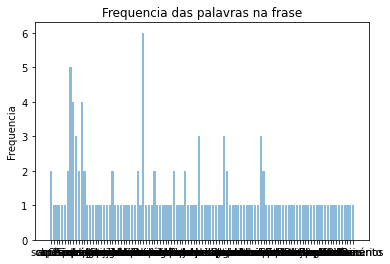

In [78]:
lista_de_frases = df[0].to_list()
lista_de_palavras = array_to_word_list(lista_de_frases)
lista_de_palavras_s_stop_words = RemoveStopWords(lista_de_palavras)
frequencia_de_palavras = freq_word(lista_de_palavras_s_stop_words.split())
plot_freq_word(frequencia_de_palavras)
